In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import plotting
import numpy as np

# Read data

In [56]:
data = pd.read_csv('../datasets/preprocessed/aux.csv', sep=',', na_values="NA")

In [57]:
data.head()

,Id,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,YrSold,SaleType,SaleCondition,SalePrice,Remod,MasVnr,SecondFloor,Baths,Porch,Pool
0,1,F,RL,8450,1,Lvl,Inside,2,CollgCr,Norm,...,2008,WD,Normal,208500,0,1,1,4.0,True,0
1,2,A,RL,9600,1,Lvl,FR,2,Veenker,Feedr,...,2007,WD,Normal,181500,0,0,0,3.0,True,0
2,3,F,RL,11250,0,Lvl,Inside,2,CollgCr,Norm,...,2008,WD,Normal,223500,1,1,1,4.0,True,0
3,4,G,RL,9550,0,Lvl,Corner,2,Crawfor,Norm,...,2006,WD,Abnorml,140000,1,0,1,2.0,True,0
4,5,F,RL,14260,0,Lvl,FR,2,NoRidge,Norm,...,2008,WD,Normal,250000,0,1,1,4.0,True,0


# Prediction preprocessing

Attribute distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99f3fc2dd8>]],
      dtype=object)

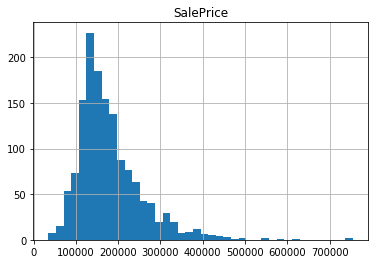

In [58]:
data.hist(column=['SalePrice'],bins=40)

Correlation with the numerical features

In [59]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Id,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,ExterQual,ExterCond,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageArea,Fence,MiscVal,MoSold,YrSold,SalePrice,Remod,MasVnr,SecondFloor,Baths,Porch,Pool
Id,1,0.007891,0.0262232,-0.0173787,-0.0274566,0.0158156,-0.0135,0.00508265,0.0229088,-0.021039,-0.0159856,0.00842849,0.00278489,0.0315607,0.00400698,0.0156963,0.0233303,-0.0153073,0.011482,-0.00786533,-0.00478699,0.0249726,0.000160302,-0.0180422,-0.00326319,-0.030488,0.0131367,0.00331783,-0.0164871,0.0456776
LotArea,0.007891,1,-0.296645,-0.13716,0.200537,-0.00216573,0.055123,0.120403,0.0531529,0.306768,0.0649823,0.0883805,0.411236,0.272712,-0.01758,0.144065,0.371111,0.309379,0.313736,-0.0117731,0.0524273,0.00327945,-0.0292296,0.397501,0.0134632,0.0645678,0.0184998,0.231252,0.0542975,0.109555
LotShape,0.0262232,-0.296645,1,0.0797316,-0.192165,0.0207372,-0.23764,-0.179951,-0.0218883,-0.171709,-0.112948,-0.109862,-0.173298,-0.0523933,0.0989272,-0.161861,-0.116574,-0.183448,-0.165498,0.05423,-0.0390776,-0.0305964,0.0389866,-0.253844,0.0767593,-0.0839649,0.00934483,-0.204288,-0.0753308,-0.0190507
LandSlope,-0.0173787,-0.13716,0.0797316,1,0.0710052,-0.0164369,0.0745948,0.0881848,0.049317,0.0116071,0.0566508,0.0269561,-0.0232451,0.0579374,0.0310318,0.0425329,0.0471593,-0.0500113,0.0263989,0.0224896,0.01318,-0.01551,0.00433658,-0.00555923,-0.0334632,0.0664942,0.000840034,-0.0316742,0.0101659,0.0135396
OverallQual,-0.0274566,0.200537,-0.192165,0.0710052,1,-0.0933079,0.572776,0.72565,0.0146595,0.541159,0.462246,0.273674,0.59008,0.105367,-0.186337,0.672796,0.422824,0.403153,0.566446,-0.189804,-0.0305434,0.0662214,-0.0256773,0.802103,-0.0855033,0.399926,0.170042,0.524192,0.320622,0.0507051
OverallCond,0.0158156,-0.00216573,0.0207372,-0.0164369,-0.0933079,1,-0.377204,-0.138883,0.399191,-0.171178,-0.0178912,0.120046,-0.0770683,0.0104304,-0.0817284,-0.0269994,-0.0566485,-0.018541,-0.143839,0.17067,0.0678149,-0.00783574,0.0407913,-0.0795692,0.310242,-0.156992,0.0564061,-0.147581,0.00419926,-0.00461431
YearBuilt,-0.0135,0.055123,-0.23764,0.0745948,0.572776,-0.377204,1,0.597526,-0.105721,0.404718,0.448432,0.384254,0.195531,-0.0694247,-0.175412,0.527791,0.0912518,0.152583,0.483743,-0.229513,-0.0341176,0.0113243,-0.0132269,0.534111,-0.417512,0.427283,-0.102802,0.509805,0.15857,-0.00667129
ExterQual,0.00508265,0.120403,-0.179951,0.0881848,0.72565,-0.138883,0.597526,1,0.010965,0.471418,0.521675,0.206853,0.42323,-0.0237798,-0.156682,0.713758,0.284095,0.252306,0.497859,-0.256678,-0.0395582,0.0431032,-0.00702661,0.6968,-0.0736763,0.34986,0.0643295,0.442293,0.257636,0.0120567
ExterCond,0.0229088,0.0531529,-0.0218883,0.049317,0.0146595,0.399191,-0.105721,0.010965,1,-0.00785749,0.0566616,0.094416,0.0139521,0.0103008,-0.0498331,0.0608231,-0.00205233,0.033665,0.0138662,0.0586925,0.0526807,0.029364,0.0142001,0.0126358,0.0888526,-0.0497361,0.0181046,0.0246154,0.0465013,0.0462121
TotalBsmtSF,-0.021039,0.306768,-0.171709,0.0116071,0.541159,-0.171178,0.404718,0.471418,-0.00785749,1,0.279104,0.216998,0.400506,0.051035,-0.0761616,0.437668,0.263809,0.316871,0.474241,-0.114704,-0.0191952,0.0261946,-0.00914897,0.648644,-0.087232,0.34781,-0.337334,0.315701,0.1847,0.0445519


We delete the columns with low correlation with SalePrice

In [60]:
#Low correlation with SalePrice
data.drop(columns=['LandSlope'],inplace=True)
data.drop(columns=['OverallCond'],inplace=True)
data.drop(columns=['ExterCond'],inplace=True)
data.drop(columns=['MoSold'],inplace=True)
data.drop(columns=['YrSold'],inplace=True)
data.drop(columns=['Remod'],inplace=True)

There are no pairs of features with a correlation above 0.9

We convert the feature to predict to categorical

In [61]:
def conversion(row):
    value = row['SalePrice']
    #if value < 50000: result = 'Level1'
    #elif value < 75000: result = 'Level2'
    if value < 100000: result = 'Level1'        
    #elif value < 125000: result = 'Level1'
    #elif value < 150000: result = 'Level2'
    #elif value < 175000: result = 'Level6'
    elif value < 200000: result = 'Level2'
    #elif value < 225000: result = 'Level8'
    #elif value < 250000: result = 'Level9'
    #elif value < 275000: result = 'Level4'
    elif value < 300000: result = 'Level3'
    #elif value < 325000: result = 'Level12'
    #elif value < 350000: result = 'Level13'
    #elif value < 375000: result = 'Level14'
    elif value < 400000: result = 'Level4'
    #elif value < 425000: result = 'Level16'
    #elif value < 4750000: result = 'Level17'
    else: result = 'Level5'
    return result

data['SalePrice'] = data.apply(conversion, axis=1)
data['SalePrice'].value_counts()

Level2    904
Level3    311
Level1    114
Level4     84
Level5     25
Name: SalePrice, dtype: int64

Normalize numerical variables

In [62]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        type_ = df[feature_name].dtype
        if type_ == 'int64' or type_ == 'float64':
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            # max_value != min_value
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

data = normalize(data)

Split the dataset in 2 parts: trainning and test

In [63]:
data.shape

(1438, 48)

In [64]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.3,random_state=2)
print('Train data size: ' + str(train_data.shape))
print('Test data size: ' + str(test_data.shape))

Train data size: (1006, 48)
Test data size: (432, 48)


Let's see the distribution of the two datasets

In [65]:
train_data['SalePrice'].value_counts(normalize=True)

Level2    0.637177
Level3    0.217694
Level1    0.070577
Level4    0.056660
Level5    0.017893
Name: SalePrice, dtype: float64

In [66]:
test_data['SalePrice'].value_counts(normalize=True)

Level2    0.608796
Level3    0.212963
Level1    0.099537
Level4    0.062500
Level5    0.016204
Name: SalePrice, dtype: float64

They are pretty similar so it's fine

# Save preprocessed dataset

Finally we delete the id column and save the preprocessed datasets to disk

In [67]:
train_data.drop(columns=['Id'],inplace=True)
test_data.drop(columns=['Id'],inplace=True)
train_data.to_csv('../datasets/preprocessed/train.csv', index = None, header=True)
test_data.to_csv('../datasets/preprocessed/test.csv', index = None, header=True)